<a href="https://colab.research.google.com/github/TaniaR078/Latihan2_Pyhton/blob/main/Praktik2_Modul4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pprint import pprint
from time import time
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sa
import statsmodels.formula.api as sm
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load data kita ke sebuah dataframe
df_customer = pd.read_csv('customer_data.csv')
df_laptop = pd.read_csv('laptop_data.csv')

# No.1

1. Supervisor memberikan Anda data-data pelanggan yang bisa diakses pada LINK berikut. Anda diminta untuk:

a. Membuat segmentasi atau cluster pelanggan
  1. Pastikan kolom Dt_Customer diubah menjadi kolom Years_Since_Registration (Menunjukkan jumlah tahun pelanggan sejak mendaftar sampai tahun sekarang)
  2. Pastikan kolom Year_Birth diubah menjadi kolom Age (Menunjukkan usia pelanggan tahun sekarang)

b. Informasikan karakteristik dari pelanggan pada masing-masing cluster tersebut. Anda dapat menamakan cluster tersebut sesuai dengan karakteristik pelanggan.

## Data Cleaning

### Missing Value

In [ ]:
# lihat informasi dari data kita
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Dt_Customer        2240 non-null   object 
 5   Recency            2240 non-null   int64  
 6   NumWebPurchases    2240 non-null   int64  
 7   NumStorePurchases  2240 non-null   int64  
 8   NumWebVisitsMonth  2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


Terdapat satu kolom yang memiliki missing value yaitu kolom income. kita akan incestigasi lebih lanjut

In [ ]:
# hitung jumlah missing value di tiap kolom
df_customer.isna().sum()

ID                    0
Year_Birth            0
Education             0
Income               24
Dt_Customer           0
Recency               0
NumWebPurchases       0
NumStorePurchases     0
NumWebVisitsMonth     0
dtype: int64

In [ ]:
# hitung proporsi missing value di tiap kolom
(df_customer.isna().sum() / df_customer.shape[0]) * 100

ID                   0.000000
Year_Birth           0.000000
Education            0.000000
Income               1.071429
Dt_Customer          0.000000
Recency              0.000000
NumWebPurchases      0.000000
NumStorePurchases    0.000000
NumWebVisitsMonth    0.000000
dtype: float64

In [ ]:
# Menghapus kolom yang memiliki missing value
df_customer = df_customer.dropna(axis=0)

# Reset indeks
df_customer = df_customer.reset_index(drop=True)

In [ ]:
# cek apakah kita sudah berhasil menghapus data yang missing
df_customer.isna().sum()

ID                   0
Year_Birth           0
Education            0
Income               0
Dt_Customer          0
Recency              0
NumWebPurchases      0
NumStorePurchases    0
NumWebVisitsMonth    0
dtype: int64

### Duplikat

In [ ]:
# mari kita lihat apakah terdapat duplikat di data kita
print(f"Terdapat {df_customer.duplicated().sum()} baris duplikat di data kita")

Terdapat 0 baris duplikat di data kita


### Typos

In [ ]:
# kita lihat distribusi data di kolom kategorik education
df_customer['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [ ]:
df_customer['Income'].value_counts()

7500.0     12
35860.0     4
37760.0     3
83844.0     3
63841.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: Income, Length: 1974, dtype: int64

In [ ]:
df_customer['Recency'].value_counts()

56    37
30    32
54    32
46    31
92    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64

### Outlier

In [ ]:
# membuat fungsi cek outlier.
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(df_customer[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(df_customer[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(df_customer[nama_kolom] >= (Q3 + 1.5*IQR))
  elif batas == 'lower_bound':
      bound = np.where(df_customer[nama_kolom] <= (Q1 - 1.5*IQR))
  return list(bound[0])

In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom Income
upper_Income = cek_outlier('Income', 'upper_bound')
lower_Income = cek_outlier('Income', 'lower_bound')
print(f"Jumlah total outlier di kolom Income : {len(upper_Income) + len(lower_Income)}")

Jumlah total outlier di kolom Income : 8


In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom Recency
upper_Recency = cek_outlier('Recency', 'upper_bound')
lower_Recency = cek_outlier('Recency', 'lower_bound')
print(f"Jumlah total outlier di kolom Recency : {len(upper_Recency) + len(lower_Recency)}")

Jumlah total outlier di kolom Recency : 0


In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom NumWebPurchases
upper_NumWebPurchases = cek_outlier('NumWebPurchases', 'upper_bound')
lower_NumWebPurchases = cek_outlier('NumWebPurchases', 'lower_bound')
print(f"Jumlah total outlier di kolom NumWebPurchases : {len(upper_NumWebPurchases) + len(lower_NumWebPurchases)}")

Jumlah total outlier di kolom NumWebPurchases : 3


In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom NumStorePurchases
upper_NumStorePurchases = cek_outlier('NumStorePurchases', 'upper_bound')
lower_NumStorePurchases = cek_outlier('NumStorePurchases', 'lower_bound')
print(f"Jumlah total outlier di kolom NumStorePurchases : {len(upper_NumStorePurchases) + len(lower_NumStorePurchases)}")

Jumlah total outlier di kolom NumStorePurchases : 0


In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom NumWebVisitsMonth
upper_NumWebVisitsMonth = cek_outlier('NumWebVisitsMonth', 'upper_bound')
lower_NumWebVisitsMonth = cek_outlier('NumWebVisitsMonth', 'lower_bound')
print(f"Jumlah total outlier di kolom NumWebVisitsMonth : {len(upper_NumWebVisitsMonth) + len(lower_NumWebVisitsMonth)}")

Jumlah total outlier di kolom NumWebVisitsMonth : 9


Terdapat 3 kolom yang memiliki nilia outlier yaitu kolom NumWebPurchases, income NumWebVisitsMonth. karena tidak terlalu banyak yang outlier maka akan kita drop

In [ ]:
# mari kita buat sebuah fungsi yang dapat menerima input sebuah data frame
# dan juga nama kolom untuk filter / menghapus data outlier
def filter_outlier(df, nama_kolom):
    if nama_kolom == 'NumWebPurchases':
        data_temp = df.loc[~df.index.isin(upper_NumWebPurchases)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_NumWebPurchases)]
        return data_temp
    if nama_kolom == 'NumWebVisitsMonth':
        data_temp = df.loc[~df.index.isin(upper_NumWebVisitsMonth)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_NumWebVisitsMonth)]
        return data_temp
    if nama_kolom == 'Income':
        data_temp = df.loc[~df.index.isin(upper_Income)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_Income)]
        return data_temp


In [ ]:
# buat dataframe baru dengan memanggil fungsi filter_outlier
data1 = filter_outlier(df_customer, 'Income')
print(data1.shape)

(2208, 9)


In [ ]:
# buat dataframe baru dengan memanggil fungsi filter_outlier
data2 = filter_outlier(data1, 'NumWebPurchases')
print(data2.shape)

(2205, 9)


In [ ]:
# buat dataframe baru dengan memanggil fungsi filter_outlier
df_customer = filter_outlier(data2, 'NumWebVisitsMonth')
print(df_customer.shape)

(2196, 9)


In [ ]:
# final data
df_customer.head(5)

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,58138.0,9/4/2012,58,8,4,7
1,2174,1954,Graduation,46344.0,3/8/2014,38,1,2,5
2,4141,1965,Graduation,71613.0,8/21/2013,26,8,10,4
3,6182,1984,Graduation,26646.0,2/10/2014,26,2,4,6
4,5324,1981,PhD,58293.0,1/19/2014,94,5,6,5


## Jawaban a

In [ ]:
# Hitung Years_Since_Registration dan Age
df_customer['Dt_Customer'] = pd.to_datetime(df_customer['Dt_Customer'])
current_year = pd.to_datetime('now').year
df_customer['Years_Since_Registration'] = current_year - df_customer['Dt_Customer'].dt.year
df_customer['Age'] = current_year - df_customer['Year_Birth']

# Ubah kolom Dt_Customer menjadi Years_Since_Registration
df_customer.drop(columns=['Dt_Customer'], inplace=True)
df_customer.drop(columns=['Year_Birth'], inplace=True)
df_customer.head()

,ID,Education,Income,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Years_Since_Registration,Age
0,5524,Graduation,58138.0,58,8,4,7,11,66
1,2174,Graduation,46344.0,38,1,2,5,9,69
2,4141,Graduation,71613.0,26,8,10,4,10,58
3,6182,Graduation,26646.0,26,2,4,6,9,39
4,5324,PhD,58293.0,94,5,6,5,9,42


In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengkodekan kolom "Education" dan menggantinya dengan nilai-nilai integer
df_customer['Education'] = label_encoder.fit_transform(df_customer['Education'])


In [ ]:
scaler = StandardScaler()
scaler.fit(df_customer)
df_customer_scaled = pd.DataFrame(scaler.transform(df_customer),columns=df_customer.columns)

df_customer_scaled.head()

,ID,Education,Income,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Years_Since_Registration,Age
0,-0.016491,-0.345625,0.307938,0.309243,1.493876,-0.573827,0.749048,1.498351,0.985686
1,-1.047662,-0.345625,-0.268501,-0.382444,-1.177272,-1.194272,-0.127769,-1.419945,1.235964
2,-0.442195,-0.345625,0.966536,-0.797456,1.493876,1.287509,-0.566178,0.039203,0.318280
3,0.186050,-0.345625,-1.231252,-0.797456,-0.795680,-0.573827,0.310639,-1.419945,-1.266812
4,-0.078053,1.433961,0.315513,1.554280,0.349098,0.046618,-0.127769,-1.419945,-1.016534


In [ ]:
df_customer.dtypes

ID                            int64
Education                     int64
Income                      float64
Recency                       int64
NumWebPurchases               int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
Years_Since_Registration      int64
Age                           int64
dtype: object

In [ ]:
df_customer.describe()

,ID,Education,Income,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Years_Since_Registration,Age
count,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000
mean,5577.573770,2.388434,51837.556922,49.058288,4.085155,5.849727,5.291439,9.973133,54.184882
std,3249.471182,1.124113,20464.782353,28.921389,2.621192,3.224226,2.281497,0.685487,11.989421
min,0.000000,0.000000,2447.000000,0.000000,0.000000,0.000000,0.000000,9.000000,27.000000
25%,2806.250000,2.000000,35538.750000,24.000000,2.000000,3.000000,3.000000,10.000000,46.000000
50%,5453.500000,2.000000,51400.500000,49.000000,4.000000,5.000000,6.000000,10.000000,53.000000
75%,8414.500000,3.000000,68363.250000,74.000000,6.000000,8.000000,7.000000,10.000000,64.000000
max,11191.000000,4.000000,105471.000000,99.000000,11.000000,13.000000,10.000000,11.000000,130.000000


### K-Means

In [ ]:
K = 5
kmeans_5 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_5.fit(df_customer)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.646s


In [ ]:
K = 10
kmeans_10 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_10.fit(df_customer)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.512s


In [ ]:
K = 15
kmeans_15 = MiniBatchKMeans(n_clusters=K)

start = time()
kmeans_15.fit(df_customer)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.394s


In [ ]:
X = df_customer.assign(
    clusters_of_5=kmeans_5.predict(df_customer),
    clusters_of_10=kmeans_10.predict(df_customer),
    clusters_of_15=kmeans_15.predict(df_customer),
)

with pd.option_context("display.max_columns", None):
    display(df_customer.head(10))

,ID,Education,Income,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Years_Since_Registration,Age
0,5524,2,58138.0,58,8,4,7,11,66
1,2174,2,46344.0,38,1,2,5,9,69
2,4141,2,71613.0,26,8,10,4,10,58
3,6182,2,26646.0,26,2,4,6,9,39
4,5324,4,58293.0,94,5,6,5,9,42
5,7446,3,62513.0,16,6,10,6,10,56
6,965,2,55635.0,34,7,7,6,11,52
7,6177,4,33454.0,32,4,4,8,10,38
8,4855,4,30351.0,19,3,2,9,10,49
10,387,1,7500.0,59,2,3,8,11,47


### Model Evaluation

#### Cluster Cardinality

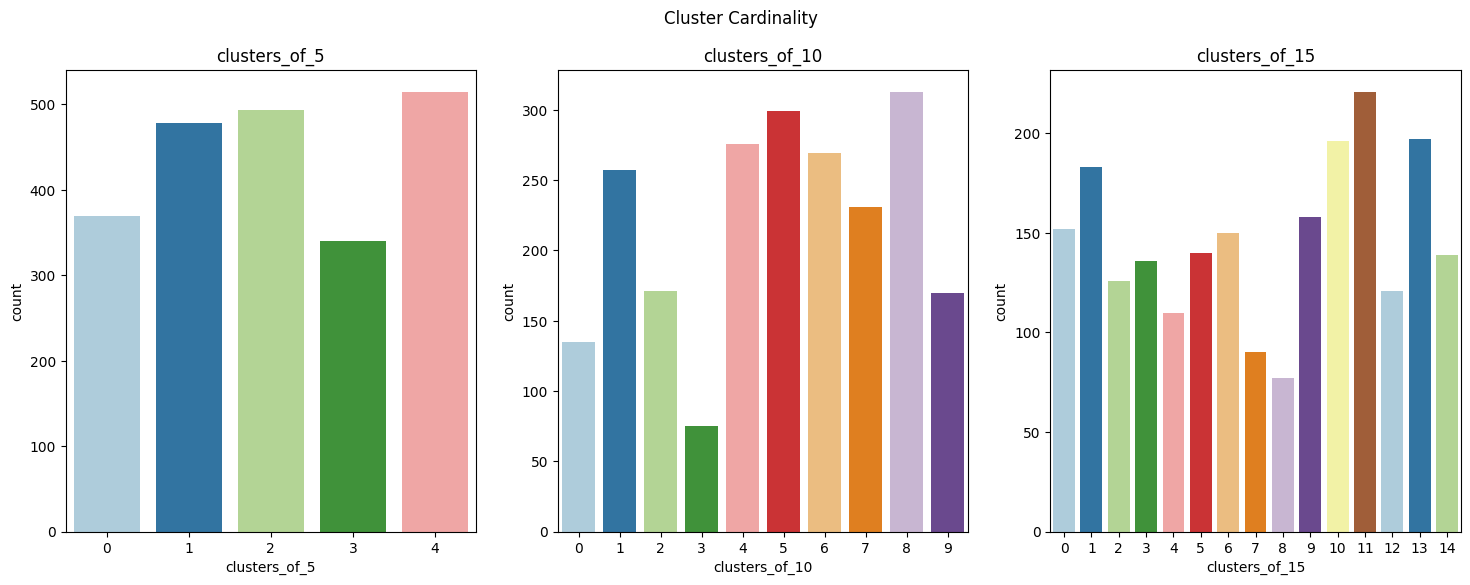

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(18, 6))
for ax, preds in zip(axis, ["clusters_of_5", "clusters_of_10", "clusters_of_15"]):
    sns.countplot(x=preds, data=X, ax=ax, palette="Paired")
    ax.set_title(preds)
plt.suptitle("Cluster Cardinality")
plt.show()

#### Cluster Magnitude

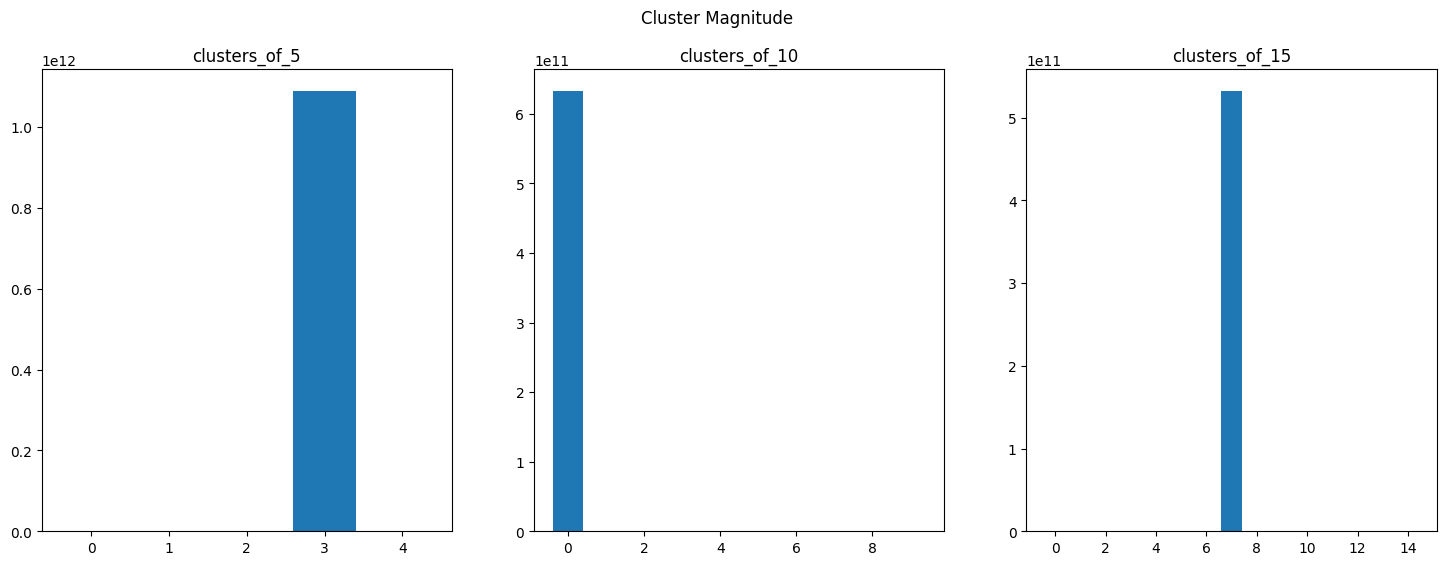

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(18, 6))
for ax, model, name in zip(axis,[kmeans_5, kmeans_10, kmeans_15],["clusters_of_5", "clusters_of_10", "clusters_of_15"]):
    distances = model.transform(df_customer_scaled)
    preds = model.predict(df_customer_scaled)
    inertia_per_cluster = np.array([sum(dist[c]**2 for dist, c in zip(distances, preds) if c == cluster)
        for cluster in range(model.n_clusters)])
    ax.bar(x=range(model.n_clusters), height=inertia_per_cluster)
    ax.set_title(name)
plt.suptitle("Cluster Magnitude")
plt.show()

#### Elbow Method

In [ ]:
# sum of squared distances
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 20):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(df_customer)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 0.247s
Clustering with n_clusters=2
Done clustering in 0.646s
Clustering with n_clusters=3
Done clustering in 2.417s
Clustering with n_clusters=4
Done clustering in 0.238s
Clustering with n_clusters=5
Done clustering in 0.434s
Clustering with n_clusters=6
Done clustering in 0.618s
Clustering with n_clusters=7
Done clustering in 0.321s
Clustering with n_clusters=8
Done clustering in 0.655s
Clustering with n_clusters=9
Done clustering in 2.458s
Clustering with n_clusters=10
Done clustering in 2.147s
Clustering with n_clusters=11
Done clustering in 1.947s
Clustering with n_clusters=12
Done clustering in 3.757s
Clustering with n_clusters=13
Done clustering in 1.531s
Clustering with n_clusters=14
Done clustering in 1.385s
Clustering with n_clusters=15
Done clustering in 1.702s
Clustering with n_clusters=16
Done clustering in 1.473s
Clustering with n_clusters=17
Done clustering in 0.694s
Clustering with n_clusters=18
Done clustering in 1.610s
C

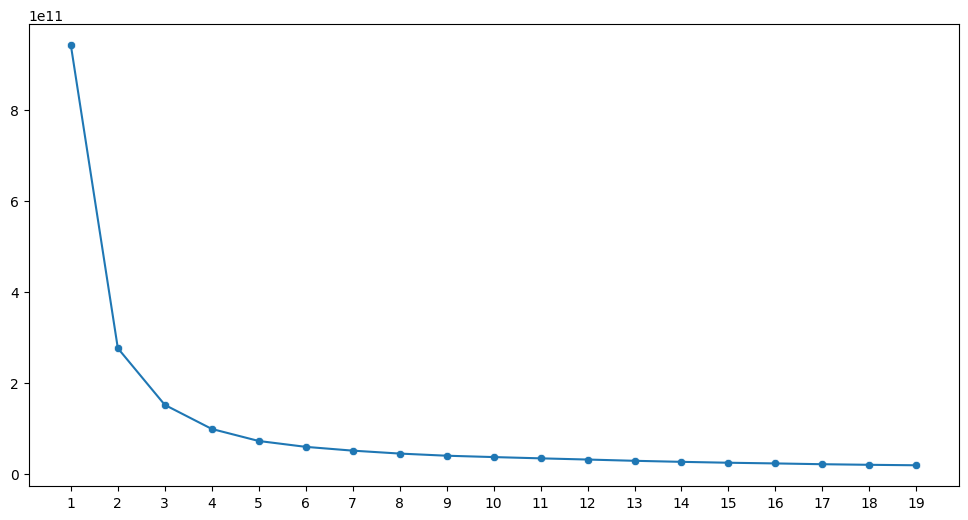

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 20), y=ssd)
sns.scatterplot(x=range(1, 20), y=ssd)
plt.xticks(range(1, 20))
plt.show()

#### Silhoutte Coefficient

In [ ]:
# Code for the whole dataset
silhouette_scores = []

# may take a longer time to run
for k in range(2, 21):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(df_customer)
    print(f"Done clustering in {time()-start:.3f}s")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(df_customer, model.labels_))
    print(f"Done calculating in {time()-start:.3f}s")

Clustering with n_clusters=2
Done clustering in 0.262s
Calculating silhouette coefficient..
Done calculating in 0.198s
Clustering with n_clusters=3
Done clustering in 1.051s
Calculating silhouette coefficient..
Done calculating in 0.211s
Clustering with n_clusters=4
Done clustering in 1.933s
Calculating silhouette coefficient..
Done calculating in 0.182s
Clustering with n_clusters=5
Done clustering in 1.393s
Calculating silhouette coefficient..
Done calculating in 0.221s
Clustering with n_clusters=6
Done clustering in 0.319s
Calculating silhouette coefficient..
Done calculating in 0.171s
Clustering with n_clusters=7
Done clustering in 0.626s
Calculating silhouette coefficient..
Done calculating in 0.098s
Clustering with n_clusters=8
Done clustering in 0.486s
Calculating silhouette coefficient..
Done calculating in 0.104s
Clustering with n_clusters=9
Done clustering in 0.771s
Calculating silhouette coefficient..
Done calculating in 0.140s
Clustering with n_clusters=10
Done clustering in

In [ ]:
df_customer_sample = df_customer[0:int(len(df_customer)*0.2)]

In [ ]:
silhouette_scores = []

# INFORMATION
# It may take a longer time to run, the sample data took around 46m 30s to be completed

for k in range(2, 21):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(df_customer_sample)
    print(f"Done clustering in {time()-start:.3f}s")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(df_customer_sample, model.labels_))
    print(f"Done calculating in {time()-start:.3f}s")

Clustering with n_clusters=2
Done clustering in 0.018s
Calculating silhouette coefficient..
Done calculating in 0.007s
Clustering with n_clusters=3
Done clustering in 0.150s
Calculating silhouette coefficient..
Done calculating in 0.008s
Clustering with n_clusters=4
Done clustering in 0.139s
Calculating silhouette coefficient..
Done calculating in 0.008s
Clustering with n_clusters=5
Done clustering in 0.157s
Calculating silhouette coefficient..
Done calculating in 0.007s
Clustering with n_clusters=6
Done clustering in 0.141s
Calculating silhouette coefficient..
Done calculating in 0.007s
Clustering with n_clusters=7
Done clustering in 0.063s
Calculating silhouette coefficient..
Done calculating in 0.007s
Clustering with n_clusters=8
Done clustering in 0.172s
Calculating silhouette coefficient..
Done calculating in 0.008s
Clustering with n_clusters=9
Done clustering in 0.148s
Calculating silhouette coefficient..
Done calculating in 0.011s
Clustering with n_clusters=10
Done clustering in

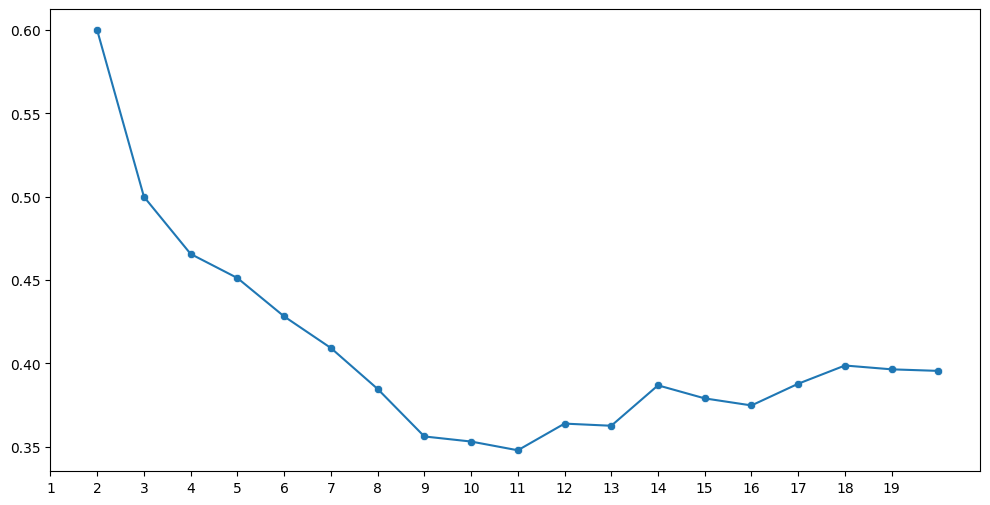

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2, 21), y=silhouette_scores)
sns.scatterplot(x=range(2, 21), y=silhouette_scores)
plt.xticks(range(1, 20))
plt.show()

## Jawaban b

Informasikan karakteristik dari pelanggan pada masing-masing cluster tersebut.

#### Cluster_of_5

In [ ]:
# Analisis karakteristik cluster
cluster_characteristics = X.groupby('clusters_of_5').agg({
    'Years_Since_Registration': 'mean',
    'Age': 'mean',
    'Recency': 'mean',
    'Income': 'mean',
    'NumWebPurchases' : 'mean',
    'NumStorePurchases' : 'mean',
    'NumWebVisitsMonth' :'mean'
})

cluster_characteristics.head()

,Years_Since_Registration,Age,Recency,Income,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
clusters_of_5,,,,,,,
0,9.905149,55.474255,49.899729,81935.636856,5.279133,8.409214,2.701897
1,9.976987,57.598326,49.518828,51425.763598,4.658996,5.889121,5.828452
2,10.012146,56.779352,48.617409,66415.718623,5.706478,8.378543,4.204453
3,10.032353,47.964706,50.294118,21547.835294,1.873529,2.914706,6.905882
4,9.941748,51.710680,47.634951,36667.730097,2.601942,3.491262,6.625243


#### Cluster_of_10

In [ ]:
# Analisis karakteristik cluster
cluster_characteristics = X.groupby('clusters_of_10').agg({
    'Years_Since_Registration': 'mean',
    'Age': 'mean',
    'Recency': 'mean',
    'Income': 'mean',
    'NumWebPurchases' : 'mean',
    'NumStorePurchases' : 'mean',
    'NumWebVisitsMonth' :'mean'
})

cluster_characteristics.head()

,Years_Since_Registration,Age,Recency,Income,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
clusters_of_10,,,,,,,
0,10.051852,45.622222,49.170370,15964.022222,1.792593,2.851852,6.970370
1,9.976654,54.968872,48.085603,71949.346304,5.536965,8.439689,3.521401
2,9.953216,54.602339,52.654971,43771.842105,3.543860,4.385965,6.269006
3,9.920000,51.680000,47.546667,91325.400000,5.546667,8.093333,2.466667
4,10.003623,57.463768,49.228261,54577.047101,5.199275,6.659420,5.615942


#### Cluster_of_15

In [ ]:
# Analisis karakteristik cluster
cluster_characteristics = X.groupby('clusters_of_15').agg({
    'Years_Since_Registration': 'mean',
    'Age': 'mean',
    'Recency': 'mean',
    'Income': 'mean',
    'NumWebPurchases' : 'mean',
    'NumStorePurchases' : 'mean',
    'NumWebVisitsMonth' :'mean'
})

cluster_characteristics.head()

,Years_Since_Registration,Age,Recency,Income,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
clusters_of_15,,,,,,,
0,9.921053,52.335526,50.690789,38618.546053,2.605263,3.519737,6.585526
1,9.967213,54.989071,52.612022,71272.131148,5.513661,8.284153,3.683060
2,9.984127,47.674603,50.269841,22392.015873,1.857143,2.952381,6.928571
3,10.014706,57.948529,49.323529,53977.977941,5.367647,6.602941,5.683824
4,10.018182,49.300000,48.936364,26010.872727,1.681818,2.945455,6.663636


# No.2

Selain itu, Anda juga diberikan referensi data-data kumpulan laptop dari e-commerce lain yang bisa diakses pada LINK berikut. Anda diminta untuk:

a. Memberikan informasi terkait spesifikasi laptop apa saja yang paling mempengaruhi tinggi dan rendahnya harga laptop

b. Membuat sebuah persamaan model regresi linear untuk memprediksi harga dari sebuah laptop berdasarkan spesifikasi

c. Adapun variabel yang termasuk ke dalam spesifikasi laptop yaitu :
Company
TypeName
RAM
Weight
Touchscreen
Ips
Ppi
Cpu_brand
HDD
SSD
Gpu_brand
Os

## Data Exploration

In [ ]:
df_laptop.head() #memperlihatkan n baris awal dari sebuah pandas dataframe (default n = 5)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
df_laptop.columns #memperlihatkan nama kolom dari sebuah pandas dataframe

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [ ]:
df_laptop.dtypes #memperlihatkan data type untuk tiap field yang ada

Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
Cpu_brand       object
HDD              int64
SSD              int64
Gpu_brand       object
Os              object
dtype: object

In [ ]:
df_laptop.describe() #describe() adalah sebuah metode dalam pandas dataframe yang digunakan untuk melakukan kalkulasi dari data statistic seperti percentile, mean, std, min, max dari serangkaian nilai numerik dari sebuah series atau dataframe

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [ ]:
#isnull() adalah sebuah fungsi untuk mendeteksi missing values dalam serangkaian obyek. Sum() adalah fungsi untuk menjumlahkan
df_laptop.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

### Pengecekan Duplikat

In [ ]:
# mari kita lihat apakah terdapat duplikat di data kita
print(f"Terdapat {df_laptop.duplicated().sum()} baris duplikat di data kita")

Terdapat 1 baris duplikat di data kita


In [ ]:
# hapus data duplikat
df_laptop = df_laptop.drop_duplicates().reset_index(drop=True)

In [ ]:
# cek apakah kita sudah berhasil menghapus data duplikat
print(f"Terdapat {df_laptop.duplicated().sum()} baris duplikat di data kita")

Terdapat 0 baris duplikat di data kita


### Outlier

In [ ]:
# membuat fungsi cek outlier.
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(df_laptop[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(df_laptop[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(df_laptop[nama_kolom] >= (Q3 + 1.5*IQR))
  elif batas == 'lower_bound':
      bound = np.where(df_laptop[nama_kolom] <= (Q1 - 1.5*IQR))
  return list(bound[0])

In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom Ram
upper_Ram = cek_outlier('Ram', 'upper_bound')
lower_Ram = cek_outlier('Ram', 'lower_bound')
print(f"Jumlah total outlier di kolom Ram : {len(upper_Ram) + len(lower_Ram)}")

Jumlah total outlier di kolom Ram : 219


<Axes: >

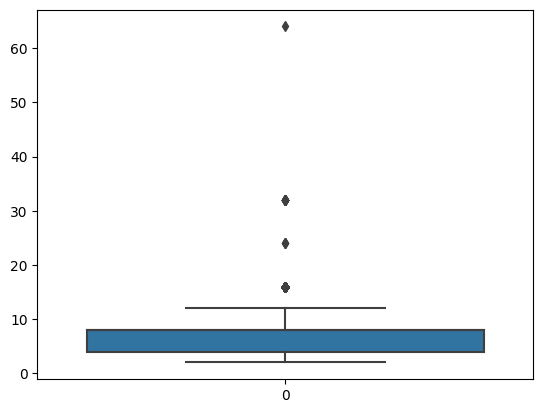

In [ ]:
sns.boxplot(df_laptop['Ram'])

In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom Weight
upper_Weight = cek_outlier('Weight', 'upper_bound')
lower_Weight = cek_outlier('Weight', 'lower_bound')
print(f"Jumlah total outlier di kolom Weight : {len(upper_Weight) + len(lower_Weight)}")

Jumlah total outlier di kolom Weight : 45


In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom Price
upper_Price = cek_outlier('Price', 'upper_bound')
lower_Price= cek_outlier('Price', 'lower_bound')
print(f"Jumlah total outlier di kolom Price : {len(upper_Price) + len(lower_Price)}")

Jumlah total outlier di kolom Price : 1


In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom TouchScreen
upper_TouchScreen = cek_outlier('TouchScreen', 'upper_bound')
lower_TouchScreen = cek_outlier('TouchScreen', 'lower_bound')
print(f"Jumlah total outlier di kolom TouchScreen : {len(upper_TouchScreen) + len(lower_TouchScreen)}")

Jumlah total outlier di kolom TouchScreen : 2357


In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom Ppi
upper_Ppi = cek_outlier('Ppi', 'upper_bound')
lower_Ppi = cek_outlier('Ppi', 'lower_bound')
print(f"Jumlah total outlier di kolom Ppi : {len(upper_Ppi) + len(lower_Ppi)}")

Jumlah total outlier di kolom Ppi : 113


In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom Ips
upper_Ips = cek_outlier('Ips', 'upper_bound')
lower_Ips = cek_outlier('Ips', 'lower_bound')
print(f"Jumlah total outlier di kolom Ips : {len(upper_Ips) + len(lower_Ips)}")

Jumlah total outlier di kolom Ips : 0


In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom HDD
upper_HDD = cek_outlier('HDD', 'upper_bound')
lower_HDD = cek_outlier('HDD', 'lower_bound')
print(f"Jumlah total outlier di kolom HDD : {len(upper_HDD) + len(lower_HDD)}")

Jumlah total outlier di kolom HDD : 0


In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom SSD
upper_SSD = cek_outlier('SSD', 'upper_bound')
lower_SSD = cek_outlier('SSD', 'lower_bound')
print(f"Jumlah total outlier di kolom SSD : {len(upper_SSD) + len(lower_SSD)}")

Jumlah total outlier di kolom SSD : 18


In [ ]:
# simpan nilai median kedua kolom secara terpisah
median_Ram = df_laptop['Ram'].median()
median_Weight = df_laptop['Weight'].median()
median_Price = df_laptop['Price'].median()
median_Ppi = df_laptop['Ppi'].median()
median_TouchScreen = df_laptop['TouchScreen'].median()
median_SSD = df_laptop['SSD'].median()
print(f"Nilai median untuk kolom price : {median_Ram}")
print(f"Nilai median untuk kolom Weight : {median_Weight}")
print(f"Nilai median untuk kolom Price : {median_Price}")
print(f"Nilai median untuk kolom Ppi : {median_Ppi}")
print(f"Nilai median untuk kolom TouchScreen : {median_TouchScreen}")
print(f"Nilai median untuk kolom SSD : {median_SSD}")

Nilai median untuk kolom price : 8.0
Nilai median untuk kolom Weight : 2.04
Nilai median untuk kolom Price : 10.872255357854844
Nilai median untuk kolom Ppi : 141.21199808219862
Nilai median untuk kolom TouchScreen : 0.0
Nilai median untuk kolom SSD : 256.0


In [ ]:
# Mengganti outlier dengan nilai median
df_laptop.loc[df_laptop['Ram'] > 8.0, 'Ram'] = 8.0
df_laptop.loc[df_laptop['Weight'] > 2.04, 'Weight'] = 2.04
df_laptop.loc[df_laptop['Price'] > 10.872255, 'Price'] = 10.872255
df_laptop.loc[df_laptop['TouchScreen'] > 0, 'TouchScreen'] = 0
df_laptop.loc[df_laptop['Ppi'] > 141.211998, 'Ppi'] = 141.211998
df_laptop.loc[df_laptop['SSD'] > 256.0, 'SSD'] = 256.0

In [ ]:
df_laptop.head(10)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,10.872255,0,1,141.211998,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,8,1.83,10.872255,0,1,141.211998,Intel Core i7,0,256,AMD,Mac
4,Apple,Ultrabook,8,1.37,10.872255,0,1,141.211998,Intel Core i5,0,256,Intel,Mac
5,Acer,Notebook,4,2.04,9.967026,0,0,100.454670,AMD Processor,500,0,AMD,Windows
6,Apple,Ultrabook,8,2.04,10.872255,0,1,141.211998,Intel Core i7,0,0,Intel,Mac
7,Apple,Ultrabook,8,1.34,10.872255,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
8,Asus,Ultrabook,8,1.30,10.872255,0,0,141.211998,Intel Core i7,0,256,Nvidia,Windows
9,Acer,Ultrabook,8,1.60,10.621952,0,1,141.211998,Intel Core i5,0,256,Intel,Windows


Jawab a

In [ ]:
label_encoder = LabelEncoder()

In [ ]:

df_laptop['TypeName_encoded'] = label_encoder.fit_transform(df_laptop['TypeName'])
df_laptop['TypeName_encoded'] = df_laptop['TypeName_encoded'].astype(int)
df_laptop = df_laptop.drop('TypeName', axis=1).rename(columns={'TypeName_encoded': 'TypeName'})


In [ ]:
df_laptop['Company_encoded'] = label_encoder.fit_transform(df_laptop['Company'])
df_laptop['Company_encoded'] = df_laptop['Company_encoded'].astype(int)
df_laptop = df_laptop.drop('Company', axis=1).rename(columns={'Company_encoded': 'Company'})

In [ ]:
df_laptop['Gpu_brand_encoded'] = label_encoder.fit_transform(df_laptop['Gpu_brand'])
df_laptop['Gpu_brand_encoded'] = df_laptop['Gpu_brand_encoded'].astype(int)
df_laptop = df_laptop.drop('Gpu_brand', axis=1).rename(columns={'Gpu_brand_encoded': 'Gpu_brand'})


In [ ]:
df_laptop['Cpu_brand_encoded'] = label_encoder.fit_transform(df_laptop['Cpu_brand'])
df_laptop['Cpu_brand_encoded'] = df_laptop['Cpu_brand_encoded'].astype(int)
df_laptop = df_laptop.drop('Cpu_brand', axis=1).rename(columns={'Cpu_brand_encoded': 'Cpu_brand'})

In [ ]:
df_laptop['Os_encoded'] = label_encoder.fit_transform(df_laptop['Os'])
df_laptop['Os_encoded'] = df_laptop['Os_encoded'].astype(int)
df_laptop = df_laptop.drop('Os', axis=1).rename(columns={'Os_encoded': 'Os'})

In [ ]:
df_laptop.head(5)

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,TypeName,Company,Gpu_brand,Cpu_brand,Os
0,8,1.37,10.872255,0,1,141.211998,0,128,4,1,1,2,0
1,8,1.34,10.776777,0,0,127.677940,0,0,4,1,1,2,0
2,8,1.86,10.329931,0,0,141.211998,0,256,3,7,1,2,1
3,8,1.83,10.872255,0,1,141.211998,0,256,4,1,0,3,0
4,8,1.37,10.872255,0,1,141.211998,0,256,4,1,1,2,0


In [ ]:
df_laptop.dtypes

Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
HDD              int64
SSD              int64
TypeName         int64
Company          int64
Gpu_brand        int64
Cpu_brand        int64
Os               int64
dtype: object

## Jawaban

Y : Price

X : Independen

maka kita akan menggunakan regresi linier berganda

H0 : tidak ada pengaruh antara variabel independen ke-j terhadap variabel dependen.

H1 : ada pengaruh variabel independen terhadap variabel dependen.

p-value < alpha maka H0 ditolak

p-value > alpha maka gagal menolak H0

In [ ]:
df_laptop.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,TypeName,Company,Gpu_brand,Cpu_brand,Os
count,1272.000000,1272.000000,1272.000000,1272.0,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,6.724843,1.795541,10.597577,0.0,0.279874,131.286408,414.040881,148.965409,2.584119,6.449686,1.174528,2.426887,1.847484
std,1.875700,0.329440,0.389826,0.0,0.449114,15.545853,518.128204,116.908131,1.247184,4.083393,0.646515,0.980214,0.402990
min,2.000000,0.690000,9.134616,0.0,0.000000,90.583402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.0,0.000000,127.335675,0.000000,0.000000,1.000000,4.000000,1.000000,2.000000,2.000000
50%,8.000000,2.040000,10.872255,0.0,0.000000,141.211998,0.000000,256.000000,3.000000,7.000000,1.000000,3.000000,2.000000
75%,8.000000,2.040000,10.872255,0.0,1.000000,141.211998,1000.000000,256.000000,3.000000,10.000000,2.000000,3.000000,2.000000
max,8.000000,2.040000,10.872255,0.0,1.000000,141.211998,2000.000000,256.000000,5.000000,18.000000,2.000000,4.000000,2.000000


In [ ]:
features = ["Company", "TypeName", "Ram", "Weight", "TouchScreen", "Ips", "Ppi", "Cpu_brand", "HDD", "SSD", "Gpu_brand", "Os" ]
x=df_laptop[features]
y=df_laptop.Price
lr=LinearRegression()
lr.fit(x,y)
lr.score(x,y)

0.65536944411861

In [ ]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ram          1272 non-null   int64  
 1   Weight       1272 non-null   float64
 2   Price        1272 non-null   float64
 3   TouchScreen  1272 non-null   int64  
 4   Ips          1272 non-null   int64  
 5   Ppi          1272 non-null   float64
 6   HDD          1272 non-null   int64  
 7   SSD          1272 non-null   int64  
 8   TypeName     1272 non-null   int64  
 9   Company      1272 non-null   int64  
 10  Gpu_brand    1272 non-null   int64  
 11  Cpu_brand    1272 non-null   int64  
 12  Os           1272 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 129.3 KB


In [ ]:
model = sm.ols(formula='Price ~ Ram + Weight + TouchScreen + Ips + Ppi  + HDD + SSD + Company + TypeName +  Gpu_brand + Cpu_brand + Os', data=df_laptop).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     217.8
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          3.94e-282
Time:                        15:15:50   Log-Likelihood:                 71.423
No. Observations:                1272   AIC:                            -118.8
Df Residuals:                    1260   BIC:                            -57.07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.2248      0.091    100.879      

**Yang paling mempengaruhi tinggi dan rendahnya harga laptop adalah Ram, TouchScreen, Weight, Ips, Ppi, Cpu_brand, HDD, SSD, Gpu_brand, dan Os.**

**Model Persamaan Regresi Linier untuk memprediksi harga dari sebuah laptop berdasarkan spesifikasi : Y=9.22+0.09X_1-0.088X_2+2.619X_3+0.03X_4+0.003X_5+7.57X_6+0.0009X_7+0.0011X_8+0.008 X_9+0.089X_10-0.043X_11+0.009X_12+1260**